In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

globalterrorismdb_0617dist.csv



In [27]:
df = pd.read_csv("../input/globalterrorismdb_0617dist.csv",encoding='ISO-8859-1')
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [29]:
minYear = 2006
maxYear = 2016
df = df[(df['iyear']>=minYear)& (df['iyear']<=maxYear)]
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
79248,200601000008,2006,1,0,01/17/2006,0,NaN,4,Afghanistan,6,...,The burning of schools is rampant in southern ...,Girls School Set on Fire in Western Province...,Those Setting Fires to Schools Should be Stam...,NaN,CETIS,0,0,0,0,NaN
79249,200601000009,2006,1,0,01/17/2006,0,NaN,97,Israel,10,...,NaN,Israel Arrests 8 Palestinians Despite Promise...,No One Hurt by Qassam Rockets; Five Palestini...,"Matti Friedman, In Striking Distance, The Je...",CETIS,-9,-9,0,-9,NaN
79250,200601000010,2006,1,0,01/17/2006,0,NaN,95,Iraq,10,...,NaN,US Troops Conduct Random Arrests in Al-Fall...,Army Hospital Treating ABC News Anchor Injure...,NaN,CETIS,-9,-9,0,-9,NaN
79251,200601000011,2006,1,0,01/17/2006,0,NaN,95,Iraq,10,...,"Victim's body was ""Bullet ridden"".","Jonathan Finer, U.S. Forces Release 5 Female ...",NaN,NaN,CETIS,-9,-9,0,-9,NaN
79252,200601000012,2006,1,0,01/17/2006,0,NaN,95,Iraq,10,...,NaN,"Robert Worth, Bombings at Christian Sites Lea...",Soldiers Arrest Chief of Baghdad Kidnapping C...,NaN,CETIS,-9,-9,0,-9,NaN


# Countries with highest terrorism attacks.

_____

In [30]:
df['country_txt'].value_counts().head(12)

Iraq           20925
Pakistan       11496
Afghanistan    10773
India           6893
Philippines     3830
Nigeria         3296
Somalia         3287
Thailand        3207
Yemen           2963
Libya           2039
Syria           1802
Egypt           1686
Name: country_txt, dtype: int64

* # Be more careful during these months

Range of crime in Iraq: 2006-2016
Range of crime in Thailand: 2006-2016
Range of crime in United States: 2006-2016
Range of crime in Finland: 2007-2016


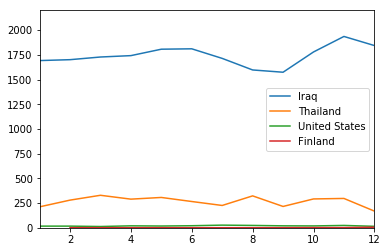

In [31]:
def monthlyCrime(countryNames):
    for countryName in countryNames:
        crimeInCountry = df[df['country_txt']==countryName]
        minYear = crimeInCountry['iyear'].min()
        maxYear = crimeInCountry['iyear'].max()
        print("Range of crime in "+countryName+": ",end='')
        print(str(minYear)+"-"+str(maxYear))
        monthCount =crimeInCountry['imonth'].value_counts()
        monthCount.sort_index().plot(ylim=(0,2200),legend=True,label=countryName)
monthlyCrime(['Iraq','Thailand','United States','Finland'])
# During Chrismas, New Year, you should be more careful in Iraq
# For Thailand, be careful on August
# For US, no clear patterns.

## Be more careful around these cities
___

In [32]:
def crimeByCity(countryName):
    return df[df['country_txt']==countryName]['city'].value_counts().head(10)

In [33]:
crimeByCity('Iraq')
# We can say that Baghdad is the most terrorist attraction (pun intended)
# Maybe because it is the capital city so it has a lot more crime compare to other

Baghdad         6694
Mosul           1707
Kirkuk           815
Baqubah          679
Fallujah         550
Ramadi           460
Unknown          438
Tikrit           377
Abu Ghraib       279
Tuz Khormato     265
Name: city, dtype: int64

In [34]:
crimeByCity('Thailand')
# Many cities with high crime rates, different from Iraq where most crime occur in one city.

Unknown         182
Bangkok         149
Muang           113
Yala            109
Bannang Sata     65
Pattani          56
Sungai Kolok     51
Yarang           50
Raman            49
Khok Pho         42
Name: city, dtype: int64

In [35]:
crimeByCity('United States')
# Similar to Iraq in which the cpaital city has the most crime occured.

New York City    19
Los Angeles       9
Washington        7
Austin            5
Las Vegas         5
Tampa             4
Joplin            4
Kansas City       4
Seattle           4
Denver            4
Name: city, dtype: int64

In [36]:
crimeByCity('Finland')
# Similar to Iraq in which the cpaital city has the most crime occured.

Tuusula        1
Oulu           1
Keltakangas    1
Ylivieska      1
Kankaanpaa     1
Pargas         1
Petajavesi     1
Kangasala      1
Asikkala       1
Rauma          1
Name: city, dtype: int64

### From all of this we can conclude that 
1.  Be alert of your life when you travel to capital city (or large city)
1. Even more alert when you go to Iraq (especially Baghdad)

## Explore crime concerning with Tourists

In [37]:
df[df['targtype1_txt']=='Tourists']['country_txt'].value_counts().head(20)

Yemen          12
India          10
Iraq            8
Egypt           8
Pakistan        7
Philippines     7
Colombia        4
France          4
Tunisia         4
Turkey          3
Afghanistan     2
Sri Lanka       2
Ethiopia        2
Myanmar         2
Jordan          2
Mali            2
Russia          2
Algeria         2
Iran            2
Kenya           2
Name: country_txt, dtype: int64

## Tourist crime by region

In [39]:
df[df['targtype1_txt']=='Tourists']['region_txt'].value_counts()
# Most countries are from Middle East & North Africa. Second is Western Europe.

Middle East & North Africa    45
South Asia                    23
Sub-Saharan Africa            11
Southeast Asia                11
South America                  5
Western Europe                 5
Eastern Europe                 4
North America                  1
East Asia                      1
Name: region_txt, dtype: int64

![](http://)## Type of attacks towards tourists

In [40]:
df[df['targtype1_txt']=='Tourists']['attacktype1_txt'].value_counts()
# Bombing is the most efficient (and conveinant) way  for terrorist to do bad things.
# You should be careful to explosion

Hostage Taking (Kidnapping)            40
Bombing/Explosion                      37
Armed Assault                          19
Facility/Infrastructure Attack          4
Hostage Taking (Barricade Incident)     3
Hijacking                               1
Unarmed Assault                         1
Unknown                                 1
Name: attacktype1_txt, dtype: int64

## Nation that were attacked the most

In [41]:
df[df['targtype1_txt']=='Tourists']['natlty1_txt'].value_counts().head(10)
# Maybe if you are born in US you might wanna be more careful when travelling.
# The cause may come from the fact that US travel a lot compare to other nation.
# Or maybe US were the most hated nation(?)

Multinational    14
India             8
France            7
United States     6
Iran              5
Germany           4
China             3
South Korea       3
Italy             3
Pakistan          3
Name: natlty1_txt, dtype: int64

# Let's explore Finland crime rate

In [42]:
df[df['country_txt']=='Finland'].shape

(14, 135)

## Only 18 for the past 30 years
____

Summary: Visit Finland